In [3]:
#load whiskies.csv
import pandas as pd
import numpy as np

whiskies = pd.read_csv("whiskies.csv")


#sort based on the highest body and smoky flavor

whiskies.sort_values(by=['Body','Smoky'],ascending=False)
whiskies.head()

#Filter the attirbutes that are going to be used on the map ['Distillery','Body', 'Smoky','lon','lat']

whiskiesfilt=whiskies.sort_values(by=['Body','Smoky'],ascending=False).head(10).filter(items=['Distillery','Body', 'Smoky','lon','lat'])



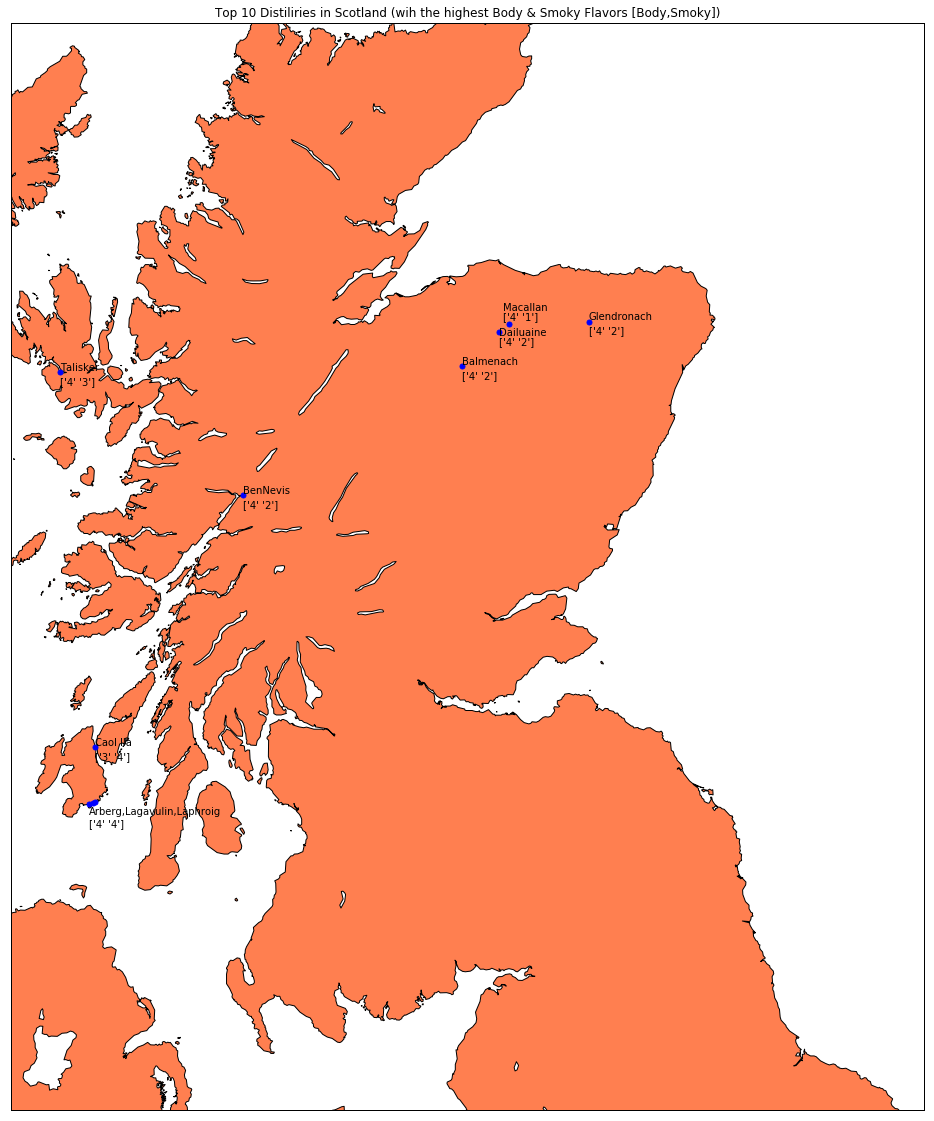

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

#Project the map of Scotland
plt.figure(figsize=(20,20))
my_map = Basemap(projection='merc', lat_0 = 51.509865, lon_0 = -0.118092,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-6.7, llcrnrlat= 54.4, urcrnrlon=-0.3, urcrnrlat=58.6)
#Draw the coastlines & fill the colors 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()

#Put the lats, lons, dist Smoky&Body each in an array
lats = whiskiesfilt['lat'].values
lons = whiskiesfilt['lon'].values
dist = whiskiesfilt['Distillery'].values
smokybody = whiskiesfilt[['Body','Smoky']].values
smokybody= smokybody.astype(str)


#Plot the points of the highest Body & Smoky on the map

x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=5)
title_string = "Top 10 Distiliries in Scotland (wih the highest Body & Smoky Flavors [Body,Smoky])" 
plt.title(title_string)

#Plot the labels of each dist on its respective point

for label, xpt, ypt,sb in zip(dist, x, y,smokybody):
    if label=='Ardbeg':
        plt.text(xpt-5000, ypt-10000, 'Arberg,Lagavulin,Laphroig')
    elif label=='Lagavulin':
        plt.text(xpt, ypt,'')
    elif label=='Laphroig':
        plt.text(xpt, ypt,'')
    elif label=='Macallan':
        plt.text(xpt-5000, ypt+3000,sb)
    elif label=='Dailuaine':
        plt.text(xpt, ypt-3000,label)   
    else:
        plt.text(xpt, ypt+1000, label)
        
#Plot the Smoky & Body of each Dist    
for xpt, ypt,sb,label in zip( x, y,smokybody,dist):
    if label=='Ardbeg':
        plt.text(xpt-5000, ypt-20000, sb)
    elif label=='Lagavulin':
        plt.text(xpt-5000, ypt-20000,'')
    elif label=='Laphroig':
        plt.text(xpt-5000, ypt-20000,'')
    elif label=='Macallan':
        plt.text(xpt-5000, ypt+10000,label)
    else:
        plt.text(xpt, ypt-10000, sb)

#plt.show()
#plt.close()

plt.savefig("sc_map.png")
